- A Perceptron is a single node that takes in model parameters and then apply some activation to produce a prediction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [20]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


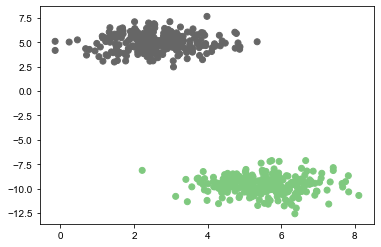

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.style.use('seaborn')
plt.show()

- We will consider `Sigmoid` as our Activation Function.

In [5]:
def sigmod(x):
    return 1/(1+np.exp(-x))

In [6]:
def predict(x,weights):
    z=np.dot(x,weights)
    predictions=sigmod(z)
    return predictions

- X matrix will contain column of 1 as it can be used for bias term

In [7]:
def loss(x,y,weights):
    y_=predict(x,weights)
    cost=np.mean(-y*np.log(y_)-(1-y)*np.log(1-y_))
    return cost

In [8]:
def update(x,y,weights,learning_rate):
    y_=predict(x,weights)
    dw=np.dot(x.T,y_-y)
    m=x.shape[0]
    
    weights-=learning_rate*dw/(float(m)) 
    return weights

In [9]:
def train(x,y,learning_rate=0.01,max_epochs=500):
    ones=np.ones((x.shape[0],1))
    x=np.hstack((ones,x))
    weights=np.zeros((x.shape[1],))
    losses=[]
    for ix in range(max_epochs):
        weights=update(x,y,weights,learning_rate)
        if ix %10==0:
            l=loss(x,y,weights)
            losses.append(l)
            print('Epoch %d loss %.4f'%(ix,l))
            
    return weights,losses

In [10]:
weights,losses=train(X,Y)

Epoch 0 loss 0.5665
Epoch 10 loss 0.2029
Epoch 20 loss 0.1275
Epoch 30 loss 0.0937
Epoch 40 loss 0.0742
Epoch 50 loss 0.0616
Epoch 60 loss 0.0527
Epoch 70 loss 0.0460
Epoch 80 loss 0.0409
Epoch 90 loss 0.0368
Epoch 100 loss 0.0335
Epoch 110 loss 0.0307
Epoch 120 loss 0.0284
Epoch 130 loss 0.0264
Epoch 140 loss 0.0247
Epoch 150 loss 0.0232
Epoch 160 loss 0.0218
Epoch 170 loss 0.0206
Epoch 180 loss 0.0196
Epoch 190 loss 0.0186
Epoch 200 loss 0.0178
Epoch 210 loss 0.0170
Epoch 220 loss 0.0162
Epoch 230 loss 0.0156
Epoch 240 loss 0.0150
Epoch 250 loss 0.0144
Epoch 260 loss 0.0139
Epoch 270 loss 0.0134
Epoch 280 loss 0.0130
Epoch 290 loss 0.0126
Epoch 300 loss 0.0122
Epoch 310 loss 0.0118
Epoch 320 loss 0.0115
Epoch 330 loss 0.0111
Epoch 340 loss 0.0108
Epoch 350 loss 0.0105
Epoch 360 loss 0.0103
Epoch 370 loss 0.0100
Epoch 380 loss 0.0098
Epoch 390 loss 0.0095
Epoch 400 loss 0.0093
Epoch 410 loss 0.0091
Epoch 420 loss 0.0089
Epoch 430 loss 0.0087
Epoch 440 loss 0.0085
Epoch 450 loss 0.0083

In [11]:
print(weights)

[0.09219021 0.14467306 0.8271422 ]


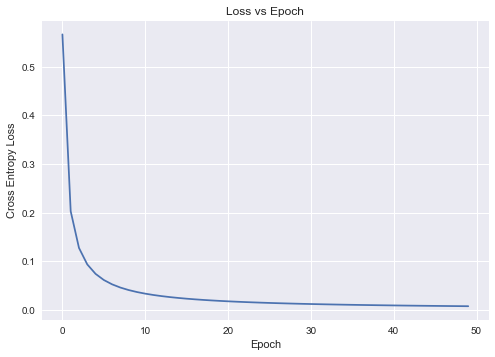

In [12]:
plt.style.use('seaborn')
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs Epoch')
plt.show()

In [13]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
y_=predict(X,weights)

In [14]:
def getPredictions(x,weights,label=True):
    if x.shape[1]!=weights.shape[0]:
        ones=np.ones((x.shape[0],1))
        x=np.hstack((ones,x))
        probs=predict(x,weights)
        if not label:
            return probs
        else:
            labels=np.zeros(probs.shape)
            labels[probs>=0.5]=1
            return labels

In [21]:
labels=getPredictions(X,weights)

In [22]:
x1=np.linspace(-12,12,20)
x2=-(weights[0]+weights[1]*x1)/weights[2]

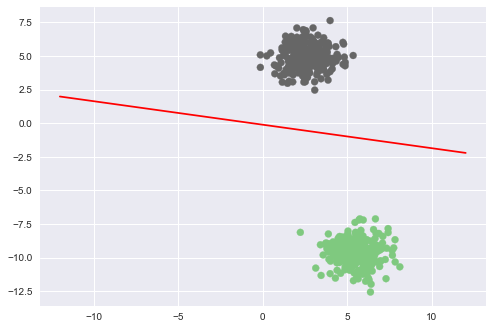

In [23]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [24]:
Y_=getPredictions(X,weights)

In [25]:
training_acc=(np.sum(Y_==Y)/Y.shape[0])*100
print("Training Accuracy of Perceptron %.2f"%(training_acc))

Training Accuracy of Perceptron 100.00
